<a href="https://colab.research.google.com/github/AkhilE-47/Regression-models/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Adjusting to replace non-ASCII characters and retry PDF generation
def clean_text(text):
    # Replace special characters with ASCII-friendly alternatives
    replacements = {
        "\u2014": "-",  # Em Dash
        "\u2022": "-",  # Bullet Point
    }
    for old, new in replacements.items():
        text = text.replace(old, new)
    return text

# Clean all text content
skills = [clean_text(skill) for skill in skills]
project1_details = [clean_text(detail) for detail in project1_details]
project2_details = [clean_text(detail) for detail in project2_details]
strengths = [clean_text(strength) for strength in strengths]

# Create a new PDF instance
pdf = FPDF()
pdf.add_page()
pdf.set_auto_page_break(auto=True, margin=15)

# Header Section
pdf.set_fill_color(*header_bg_color)
pdf.set_text_color(*header_text_color)
pdf.set_font('Arial', 'B', 20)
pdf.cell(0, 15, 'Akhil Eriginei', ln=True, align='C', fill=True)

# Contact Information
pdf.set_text_color(*section_text_color)
pdf.set_font('Arial', '', 12)
pdf.ln(5)
pdf.multi_cell(0, 10, "Location: Hyderabad, Telangana, India | Email: akhilerigineni@mail.com | Mobile: +91 8897168897")

# Section - Career Objective
pdf.set_font('Arial', 'B', 14)
pdf.ln(10)
pdf.cell(0, 10, 'Career Objective', ln=True)
pdf.set_font('Arial', '', 12)
pdf.multi_cell(0, 10, clean_text("Aspiring Machine Learning Engineer with a strong foundation in Python, data analysis, and artificial intelligence. Passionate about applying machine learning algorithms to solve real-world problems. Eager to contribute to innovative projects, collaborate with teams, and grow in a dynamic technical environment."))

# Section - Education
pdf.set_font('Arial', 'B', 14)
pdf.ln(10)
pdf.cell(0, 10, 'Education', ln=True)

pdf.set_font('Arial', 'B', 12)
pdf.cell(0, 10, 'Master of Computer Applications', ln=True)
pdf.set_font('Arial', '', 12)
pdf.multi_cell(0, 8, clean_text("Vaagdevi Degree and PG College, Hanamkonda, Telangana, India - Nov 2020 - Dec 2022\nCGPA: 7.1"))

pdf.set_font('Arial', 'B', 12)
pdf.cell(0, 10, 'Bachelor of Science in Computer Science', ln=True)
pdf.set_font('Arial', '', 12)
pdf.multi_cell(0, 8, clean_text("Vaagdevi Degree and PG College, Hanamkonda, Telangana, India - May 2016 - May 2019\nCGPA: 7.8"))

# Section - Technical Skills
pdf.set_font('Arial', 'B', 14)
pdf.ln(10)
pdf.cell(0, 10, 'Technical Skills', ln=True)
pdf.set_font('Arial', '', 12)
for skill in skills:
    pdf.multi_cell(0, 8, f"- {skill}")

# Section - Projects
pdf.set_font('Arial', 'B', 14)
pdf.ln(10)
pdf.cell(0, 10, 'Projects', ln=True)

# Project 1
pdf.set_font('Arial', 'B', 12)
pdf.multi_cell(0, 8, "Human Activity Recognition using CNN\nPython, OpenCV, Scikit-Learn, Git")
pdf.set_font('Arial', '', 12)
for detail in project1_details:
    pdf.multi_cell(0, 8, f"- {detail}")

# Project 2
pdf.set_font('Arial', 'B', 12)
pdf.ln(5)
pdf.multi_cell(0, 8, "Library Management System\nPython, HTML, CSS, JavaScript, Django, Git")
pdf.set_font('Arial', '', 12)
for detail in project2_details:
    pdf.multi_cell(0, 8, f"- {detail}")

# Section - Strengths
pdf.set_font('Arial', 'B', 14)
pdf.ln(10)
pdf.cell(0, 10, 'Strengths', ln=True)
pdf.set_font('Arial', '', 12)
for strength in strengths:
    pdf.multi_cell(0, 8, f"- {strength}")

# Save the PDF
pdf_output_path = '/mnt/data/fresher_machine_learning_resume.pdf'
pdf.output(pdf_output_path)
pdf_output_path


NameError: name 'skills' is not defined

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('trainms-patients.csv')

# Data Cleaning - Drop unnecessary columns
df_cleaned = df.drop(['s.no', 'Timestamp', 'comments'], axis=1)

# Handling missing values using SimpleImputer
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_num = SimpleImputer(strategy='mean')

categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

df_cleaned[categorical_cols] = imputer_cat.fit_transform(df_cleaned[categorical_cols])
df_cleaned[numerical_cols] = imputer_num.fit_transform(df_cleaned[numerical_cols])

# Encoding categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

# Feature Selection
X = df_cleaned.drop('mental_health_consequence', axis=1)
y = df_cleaned['mental_health_consequence']

# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# KNN Model with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and Evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)

Saving trainms-patients.csv to trainms-patients.csv
Accuracy: 0.53

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.60      0.47        62
           1       0.69      0.64      0.66        83
           2       0.56      0.27      0.37        55

    accuracy                           0.53       200
   macro avg       0.54      0.50      0.50       200
weighted avg       0.56      0.53      0.52       200



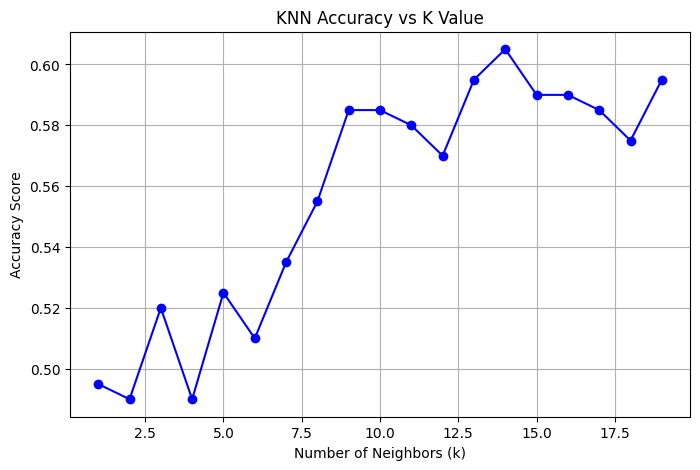

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Visualizing Accuracy vs K Values
k_values = range(1, 20)
#k_values = 5
accuracy_scores = []

# Train and evaluate KNN for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred_k))

# Plotting the accuracy vs k values
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.title('KNN Accuracy vs K Value')
plt.grid(True)
plt.show()
